# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


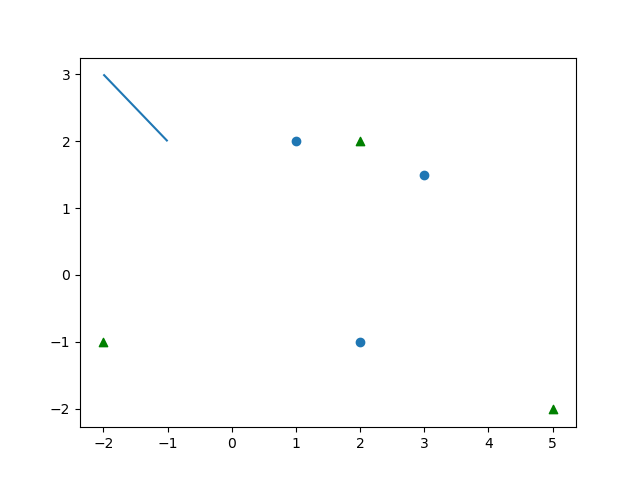

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

## Rozwiązanie

### Przygotowanie zbiorów

In [4]:
import random
import math

sets = []
setsDesc = ["Zbiór 1", "Zbiór 2", "Zbiór 3", "Zbiór 4"]

#### Zbiór 1

<IPython.core.display.Javascript object>


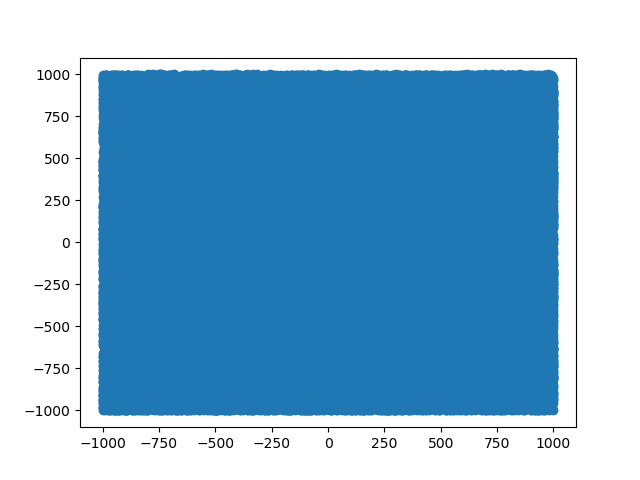

In [5]:
set = []

for i in range (10 ** 5):
    set.append(((random.uniform(-1000, 1000)), (random.uniform(-1000, 1000))))
    
sets.append(set)

%matplotlib notebook
plot = Plot([PointsCollection(set)])
plot.draw()

#### Zbiór 2

<IPython.core.display.Javascript object>


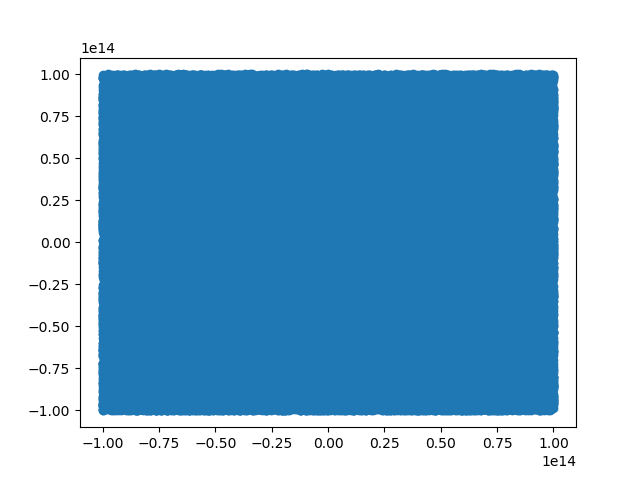

In [6]:
set = []

for i in range (10 ** 5):
    set.append(((random.uniform(-1 * 10 ** 14, 10 ** 14)),
                 (random.uniform(-1 * 10 ** 14, 10 ** 14))))
    
sets.append(set)

%matplotlib notebook
plot = Plot([PointsCollection(set)])
plot.draw()

#### Zbiór 3

<IPython.core.display.Javascript object>


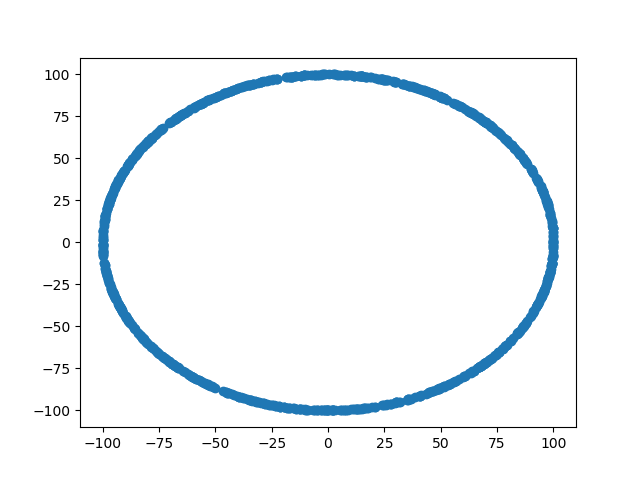

In [7]:
set = []

R = 100
circle_x = 0
circle_y = 0

for i in range(1000):
    alpha = 2 * math.pi * random.random()
    x = R * math.cos(alpha) + circle_x
    y = R * math.sin(alpha) + circle_y
    set.append((x, y))

sets.append(set)
    
%matplotlib notebook
plot = Plot([PointsCollection(set)])
plot.draw()

#### Zbiór 4

<IPython.core.display.Javascript object>


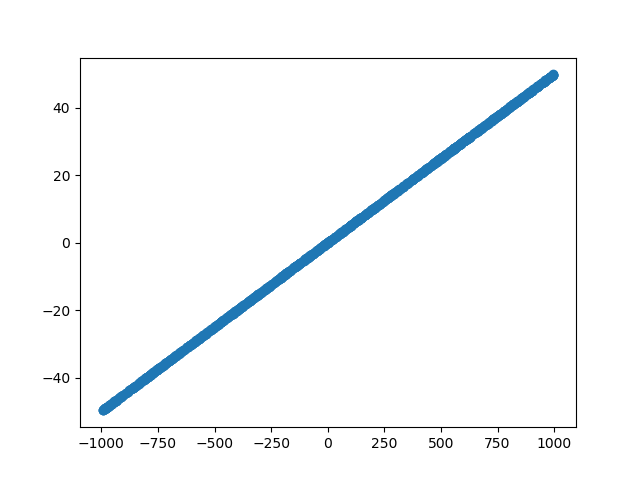

In [8]:
set = []

Pa = [-1.0, 0.0]
Pb = [1.0, 0.1]

a = (Pa[1] - Pb[1]) / (Pa[0] - Pb[0])
b = Pa[1] - Pa[0] * a

for i in range(1000):
    x = random.uniform(-1000, 1000)
    y = a*x + b
    set.append((x, y))
    
sets.append(set)

%matplotlib notebook
plot = Plot([PointsCollection(set)])
plot.draw()

### Definicje wyznaczników

In [9]:
#Możliwość zmiany precyzji:
prec = np.float32
#prec = np.float64

#Wyznacznik obliczany przez numpy sposobem 1
def det1np(A, B, C):
    a = np.array([[A[0], A[1], 1], [B[0], B[1], 1], [C[0], C[1], 1]])
    return prec(np.linalg.det(a))

#Wyznacznik obliczany ręcznie sposobem 1
def det1m(A, B, C):
    return prec((A[0]*B[1] + B[0]*C[1] + C[0]*A[1] - C[0]*B[1] - A[0]*C[1] - B[0]*A[1]))

#Wyznacznik obliczany przez numpy sposobem 2
def det2np(A, B, C):
    a = np.array([[A[0] - C[0], A[1] - C[1]], [B[0] - C[0], B[1] - C[1]]])
    return prec(np.linalg.det(a))

#Wyznacznik obliczany ręcznie sposobem 2
def det2m(A, B, C):
    return prec(((A[0] - C[0]) * (B[1] - C[1]) - (A[1] - C[1]) * (B[0] - C[0])))

dets = []
dets.append(det1np)
dets.append(det1m)
dets.append(det2np)
dets.append(det2m)
detsDesc = ["numpy 1", "ręcznie 1", "numpy 2", "ręcznie 2"]

### Funkcja klasyfikująca

In [10]:
def classify(set, det, points, diffPoints, eps):
    A = [-1.0, 0.0]
    B = [1.0, 0.1]
    left = []
    right = []
    on = []
    resPoints = []

    for i in range(len(set)):
        C = set[i]
        if det(A, B, C) < -eps:
            right.append(C)
            
            if (points[i] == "n"):
                points[i] = "r"
            elif (points[i] != "r" and points[i] != "s"):
                points[i] = "s"
                diffPoints.append(C)
                
        elif det(A, B, C) > eps:
            left.append(C)
            
            if (points[i] == "n"):
                points[i] = "l"
            elif (points[i] != "l" and points[i] != "s"):
                points[i] = "s"
                diffPoints.append(C)
                
        else:
            on.append(C)
            
            if (points[i] == "n"):
                points[i] = "o"
            elif (points[i] != "o" and points[i] != "s"):
                points[i] = "s"
                diffPoints.append(C)
    
    return(left, right, on)

### Działanie wyznaczników i wyznaczenie różnie kwalifikowanych punktów

In [11]:
eps = 10 ** (-14)
results = []
diffPoints = []

for i in range(len(sets)):
    set = sets[i]
    results.append([])
    diffPoints.append([])
    points = ["n"] * len(set)
    
    for j in range(len(dets)):
        det = dets[j]
        
        (left, right, on) = classify(set, det, points, diffPoints[i], eps)
        results[i].append((left, right, on))

In [12]:
for i in range(len(sets)):
    setDesc = setsDesc[i]
    
    print(setDesc, ":")
    for j in range(len(dets)):
        detDesc = detsDesc[j]
        
        (left, right, on) = results[i][j]
        print("%9s"%detDesc, ": left: ", len(left), ", right: ", len(right), ", on: ", len(on), sep = '')
    print("Różnie zakwalifikowane punkty: ", len(diffPoints[i]), "\n")

Zbiór 1 :
  numpy 1: left: 49854, right: 50146, on: 0
ręcznie 1: left: 49854, right: 50146, on: 0
  numpy 2: left: 49854, right: 50146, on: 0
ręcznie 2: left: 49854, right: 50146, on: 0
Różnie zakwalifikowane punkty:  0 

Zbiór 2 :
  numpy 1: left: 49895, right: 50105, on: 0
ręcznie 1: left: 49895, right: 50105, on: 0
  numpy 2: left: 49895, right: 50105, on: 0
ręcznie 2: left: 49890, right: 50104, on: 6
Różnie zakwalifikowane punkty:  7 

Zbiór 3 :
  numpy 1: left: 500, right: 500, on: 0
ręcznie 1: left: 500, right: 500, on: 0
  numpy 2: left: 500, right: 500, on: 0
ręcznie 2: left: 500, right: 500, on: 0
Różnie zakwalifikowane punkty:  0 

Zbiór 4 :
  numpy 1: left: 19, right: 102, on: 879
ręcznie 1: left: 0, right: 0, on: 1000
  numpy 2: left: 445, right: 451, on: 104
ręcznie 2: left: 150, right: 122, on: 728
Różnie zakwalifikowane punkty:  910 



### Wizualizacja kwalifikacji

<IPython.core.display.Javascript object>


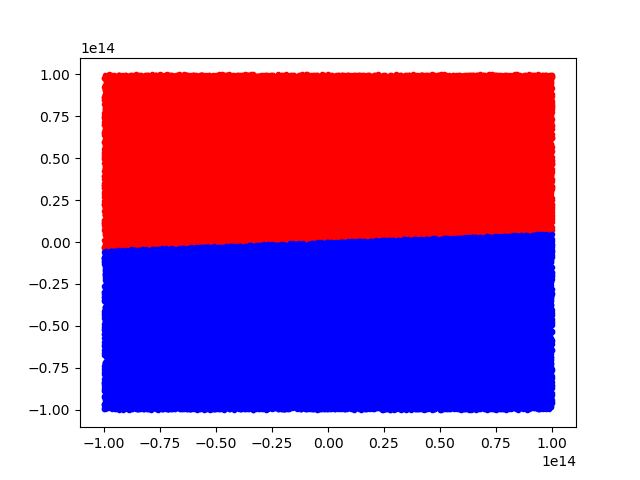

In [13]:
# ... = results[0-3][0-3]
(left, right, on) = results[1][1]

%matplotlib notebook

plot = Plot([PointsCollection(left, color = 'red', marker = '.'),
             PointsCollection(on, color = 'black', marker = '.'),
             PointsCollection(right, color = 'blue', marker = '.')],
            [LinesCollection([[(-1000, a * (-1000) + b),(1000, a * 1000 + b)]])])
plot.draw()

### Graficzne różnice w podziale punktów

#### Zbiór 1

<IPython.core.display.Javascript object>


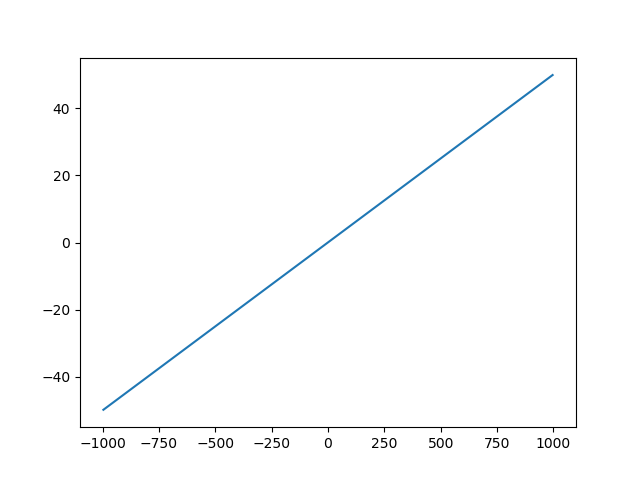

In [14]:
%matplotlib notebook

plot = Plot([PointsCollection(diffPoints[0], color = 'red', marker = '.')],
            [LinesCollection([[(-1000, a * (-1000) + b),(1000, a * 1000 + b)]])])
plot.draw()

#### Zbiór 2

<IPython.core.display.Javascript object>


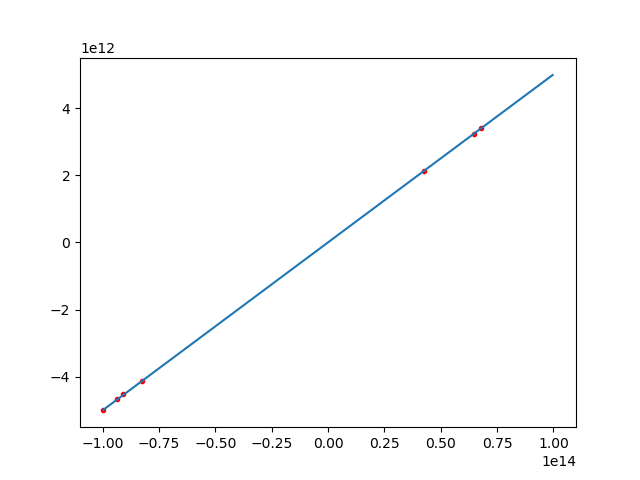

In [15]:
%matplotlib notebook

plot = Plot([PointsCollection(diffPoints[1], color = 'red', marker = '.')],
            [LinesCollection([[(-1 * 10 ** 14, a * (-1 * 10 ** 14) + b),(10 ** 14, a * (10 ** 14) + b)]])])
plot.draw()

#### Zbiór 3

<IPython.core.display.Javascript object>


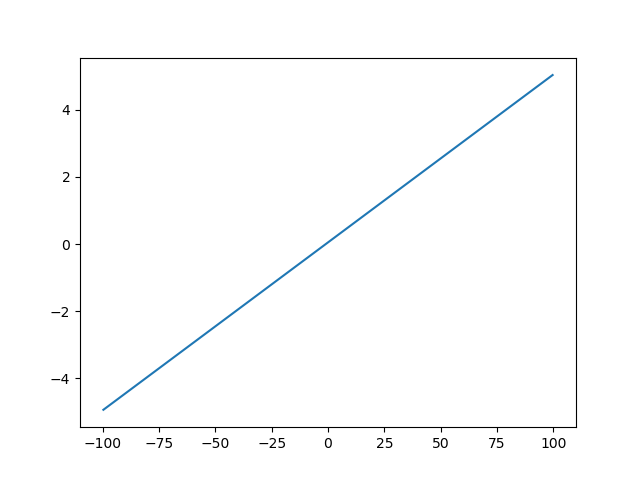

In [16]:
%matplotlib notebook

plot = Plot([PointsCollection(diffPoints[2], color = 'red', marker = '.')],
            [LinesCollection([[(-100, a * (-100) + b),(100, a * 100 + b)]])])
plot.draw()

#### Zbiór 4

<IPython.core.display.Javascript object>


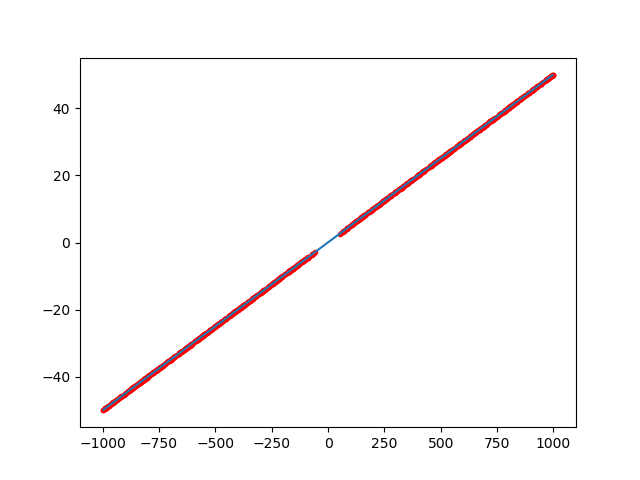

In [17]:
%matplotlib notebook

plot = Plot([PointsCollection(diffPoints[3], color = 'red', marker = '.')],
            [LinesCollection([[(-1000, a * (-1000) + b),(1000, a * 1000 + b)]])])
plot.draw()